# XML example and exercise
****
+ study examples of accessing nodes in XML tree structure  
+ work on exercise to be completed and submitted
****
+ reference: https://docs.python.org/2.7/library/xml.etree.elementtree.html
+ data source: http://www.dbis.informatik.uni-goettingen.de/Mondial
****

In [40]:
from xml.etree import ElementTree as ET
from xml.etree.ElementTree import Element
from xml.etree.ElementTree import SubElement

## XML example

+ for details about tree traversal and iterators, see https://docs.python.org/2.7/library/xml.etree.elementtree.html

In [41]:
document_tree = ET.parse( './data/mondial_database_less.xml' )

In [42]:
# print names of all countries
for child in document_tree.getroot():
    print child.find('name').text

In [43]:
# print names of all countries and their cities
for element in document_tree.iterfind('country'):
    print '* ' + element.find('name').text + ':',
    capitals_string = ''
    for subelement in element.getiterator('city'):
        capitals_string += subelement.find('name').text + ', '
    print capitals_string[:-2]

****
## XML exercise

Using data in 'data/mondial_database.xml', the examples above, and refering to https://docs.python.org/2.7/library/xml.etree.elementtree.html, find

1. 10 countries with the lowest infant mortality rates
2. 10 cities with the largest population
3. 10 ethnic groups with the largest overall populations (sum of best/latest estimates over all countries)
4. name and country of a) longest river, b) largest lake and c) airport at highest elevation

In [44]:
document = ET.parse( './data/mondial_database.xml' )

In [45]:
import pandas as pd
countries=[]
mortality=[]
dfs= pd.DataFrame()
for element in document.iterfind('country'):
  country=element.find('name').text
  countries.append(country)
  try:
      infant_mortality=element.find('infant_mortality').text
      mortality.append(float(infant_mortality))
   
  except:
      infant_mortality="NAN"
      mortality.append(float(infant_mortality))
      continue
df=pd.DataFrame({"Countries":countries, "Infant mortality":mortality})
df.sort_values(by = 'Infant mortality',ascending=True).head(10)



,Countries,Infant mortality
38,Monaco,1.81
98,Japan,2.13
117,Bermuda,2.48
36,Norway,2.48
106,Singapore,2.53
37,Sweden,2.60
10,Czech Republic,2.63
78,Hong Kong,2.73
79,Macao,3.13
44,Iceland,3.15


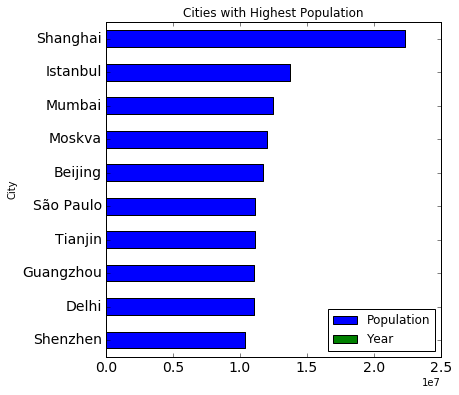

In [46]:
tree = ET.parse('./data/mondial_database.xml')
root = tree.getroot()

#create lists to store the data for lately built the dataframe up.
city_list=[]
year_list=[]
popu_list=[]

    
for element in root.iter('country'): #go to node country

    for city in element.iter('city'): #go to the child city
        cities=city.find('name').text # take the name of the city
        for pop in city.iter(): 
            if pop.tag == 'population': #take only the population elements
                city_list.append(cities) #fill the lists above created with the city names
                year_list.append(int(pop.attrib.get('year'))) #fill the year_list with the atributes of the population atribute Year. 
                popu_list.append(int(pop.text)) #fill the population list with the population   

                
#put the lists together into a dataframe
dfcaca=pd.DataFrame({'City':city_list, 'Year':year_list, 'Population':popu_list})
            #print pop.find('population').text

#to report the cities with the largest population we only consider the last measurement for 
#each city. Therefore, we only take the last population data and the rest are remevoed.  
NoDupli=dfcaca.sort_values(by= ['Year','Population'],ascending=True).drop_duplicates(['City'],keep='last')
#Finally the dataframe is sorted by population:
Top10 = NoDupli.sort_values(by = 'Population',ascending=False).head(10).set_index(['City'])

Top10.sort(['Population']).plot(kind='barh', stacked= True, title= "Cities with Highest Population", figsize=(6,6), fontsize= 14)

In [47]:
%pylab inline
import sys
reload(sys)
sys.setdefaultencoding('utf8')


In [48]:
county_list = []
ethenic_list = []
percentage_list = []
countries_popus = []
popu_country = []
popu_year = []

for element in root.iter('country'):
    countries = element.find('name').text
    for pop in element.iter():
        
        if pop.tag == 'population':
            countries_popus.append(countries)
            popu_year.append(int(pop.attrib.get('year')))
            popu_country.append(int(pop.text))
            
        elif pop.tag == 'city' or pop.tag == 'province':
            break

            
    for items in element.iter():
        
        if items.tag == 'ethnicgroup':
            county_list.append(countries)
            percentage_list.append(float(items.attrib.get("percentage")))
            ethenic_list.append(items.text)

Ethenic_per_country = pd.DataFrame({"Country": county_list, "Ethenic_list":ethenic_list, "Percentage": percentage_list})

popu_year = pd.DataFrame({"countries": countries_popus, "Population_Country": popu_country, "Year": popu_year})

C = []
P = []

for item in popu_year.countries.unique():
    
    C.append(item)
    
    data = popu_year[popu_year.countries == item].sort("Year", ascending = False)
    best_estimate = data[data["Year"] == data.Year.max()].Population_Country
    P.append(int(best_estimate))
    
CP = pd.DataFrame({"Country": C, "Population": P})

CP.head(10)
Ethenic_per_country.head(10)

,Country,Ethenic_list,Percentage
0,Albania,Albanian,95.0
1,Albania,Greek,3.0
2,Greece,Greek,93.0
3,Macedonia,Macedonian,64.2
4,Macedonia,Albanian,25.2
5,Macedonia,Turkish,3.9
6,Macedonia,Gypsy,2.7
7,Macedonia,Serb,1.8
8,Serbia,Serb,82.9
9,Serbia,Montenegrin,0.9


In [49]:
ethenic_popu = pd.DataFrame.merge(Ethenic_per_country.sort("Country"), CP.sort("Country"))
ethenic_popu.loc[:, "group_popu"] = pd.Series((ethenic_popu.Percentage/100)* ethenic_popu.Population, index = ethenic_popu.index)
ethenic_popu.head(5)

,Country,Ethenic_list,Percentage,Population,group_popu
0,Afghanistan,Tajik,25.0,26023100,6505775.0
1,Afghanistan,Pashtun,38.0,26023100,9888778.0
2,Afghanistan,Uzbek,6.0,26023100,1561386.0
3,Afghanistan,Hazara,19.0,26023100,4944389.0
4,Albania,Albanian,95.0,2800138,2660131.1


In [50]:
result = ethenic_popu[['Ethenic_list','group_popu']]

final = result.groupby("Ethenic_list")[["group_popu"]].sum()
p = final.sort("group_popu", ascending=False).head(10)
p

,group_popu
Ethenic_list,
Han Chinese,1.245059e+09
Indo-Aryan,8.718156e+08
European,4.948722e+08
African,3.183251e+08
Dravidian,3.027137e+08
Mestizo,1.577344e+08
Bengali,1.467769e+08
Russian,1.318570e+08
Japanese,1.265342e+08


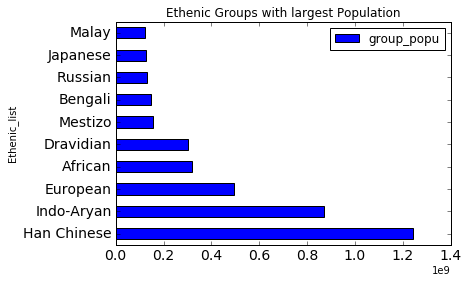

In [51]:
p.plot(kind = "Barh", stacked = True, title= "Ethenic Groups with largest Population", fontsize = 14)

In [15]:

import html5lib
import pandas as pd
river_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_rivers_by_length')

rivers = river_table[5]

rivers.columns = ['River','Name','Length_km', 'length_miles', 'Drainage_area_km2', 'Average_Discharge_m3/s', 'Outflow','Countries']

rivers = rivers.drop(rivers.head(1).index)
rivers.sort_values(by='Length_km', ascending = False).head(1)[['Name', 'Countries']]

#rivers.head(10)

#river_table[5]

,Name,Countries
4,Mississippi–Missouri–Jefferson,"United States (98.5%), Canada (1.5%)"


In [19]:
lake_table= pd.read_html('https://en.wikipedia.org/wiki/List_of_lakes_by_area')

Lakes=lake_table[1]
Lakes.columns = ['NaN','Name', 'Countries','Area','Length','Maximum_depth','Water_volume','Thumbnail', 'Notes']
Lakes.set_index('Name')
#Drop the first row which shows the index twice
Lakes=Lakes.drop(Lakes.head(1).index)#.set_index('Name')
#Lakes.head(1)

Lakes.sort_values(by='Length', ascending=False).head(1)[['Name','Countries']]

,Name,Countries
1,Caspian Sea*,Kazakhstan Russia Turkmenistan Azerbaijan ...


In [20]:

airport_table= pd.read_html('https://en.wikipedia.org/wiki/List_of_highest_commercial_airports')
airports=airport_table[0]

airports.columns = ['Airport_Name', 'Countries','Coordinates ','Elevation(m)','Elevation(ft)']
airports=airports.drop(airports.head(1).index)#.set_index('Name')
airports.sort_values(by="Elevation(m)",ascending=False).head(1)[["Airport_Name","Countries"]] 

,Airport_Name,Countries
1,Daocheng Yading Airport,China
